**Anmerkungen zur Bedienung der interaktiven Präsentation**

- Die Vortragspräsentation ist als interaktive [Rise](https://rise.readthedocs.io/en/latest/) Präsentation konzeptioniert.

- Um die interaktive Präsentation zu starten, öffnen Sie bitte die URL https://tinyurl.com/fs-plv1 in ihrem Browser.
<!-- oder scannen den QR Code -> kann ja das dann nicht bedienen? -->
- Es kann ein wenig dauern, bis die Präsentation gestartet wird.
- Falls die Präsentation nicht automatisch startet und Sie ein Jupyter notebook sehen, bitte laden Sie die Seite neu.
- Die interaktive Präsentation kann mittels der Navigationspfeile oder wie folgt bedient werden:
    - `Leertaste`: Eine Folie weiter.
    - `Hochstelltaste + Leertaste`: Eine Folie zurück.
    - `Strg + Enter`: Laden eines interaktiven Plots.
    - `Alt + r`: Aktivieren bzw. Deaktivieren der Präsentation.
    - Falls ein interaktive Plot bei Ausführung einer Code Zelle nicht richtig positioniert ist, deaktiviere und aktiviere Sie die Präsentation indem sie zwei Mal `Alt + r` drücken.

<div align="center" style="font-size:40px;">
Probelehrveranstaltung für die Professur für Angewandte Mathematik mit Schwerpunkt Statistical Learning
<br><br>
Stationarität von Zeitreihen mit Anwendung an einem praktischen Beispiel
<br><br>
Dr. Fabian Spanhel
<div/>
    
<div align="left" style="font-size:16px;">
<div/>



# Einführung und Motivation

<img src="./figures/inflation.png" alt="Inflationsrate" style="width: 4200px"/>

**Was ist eine Zeitreihe?**
<br><br>

Im Folgenden, sei $T \in \mathbb{Z}$.

Wenn wir von einer (diskreten) Zeitreihe sprechen, können damit zwei verschiedene Begriffe gemeint sein:
<blockquote style="width: auto; background-color: 
                   lightyellow; color: black; 
                   margin: 70px; 
                   padding: 20px; 
                   border: 3px solid #ccc;
                   margin-bottom: 0px;
                   margin-top: 60px
                   ">
<!--
1. Eine Zeitreihe ist eine Abfolge von Daten $(y_t)_{t=1,...,T}$, die in zeitlicher Reihenfolge angeordnet sind.
<br><br>
2. Eine Zeitreihe ist ein stochastischer Prozess $(Y_t)_{t\in \mathbb{Z}}$, d.h., ein Folge von Zufallsvariablen mit einem Index $t$, der für Zeitpunkte steht.
-->
<ol style="margin: 20; padding: 0">
    <li>Eine Zeitreihe ist eine <strong>Abfolge von Daten</strong> $(y_t)_{t=1,...,T}$, die in zeitlicher Reihenfolge angeordnet sind.</li>
    <li>Eine Zeitreihe ist ein <strong>stochastischer Prozess</strong> $(Y_t)_{t\in \mathbb{Z}}$, d.h., ein Folge von Zufallsvariablen mit einem Index $t$, der für Zeitpunkte steht.</li>
</ol>
</blockquote>



**Die Verbindung zwischen 1. und 2. ergibt sich dadurch, dass Daten $(y_t)_{t=1,...,T}$ in 1. als eine Stichprobe eines zugrunde liegenden stochastischen Prozesses $(Y_t)_{t\in \mathbb{Z}}$ in 2. aufgefasst werden.**

**Illustration des Zusammenhangs zwischen Zeitreihendaten und -prozess**

<img src="./figures/zeitreihen_1.png" alt="" style="width: 4200px"/>

interactive(children=(ToggleButtons(button_style='info', description=' ', options=('Daten', 'Zufallsvariablen'…

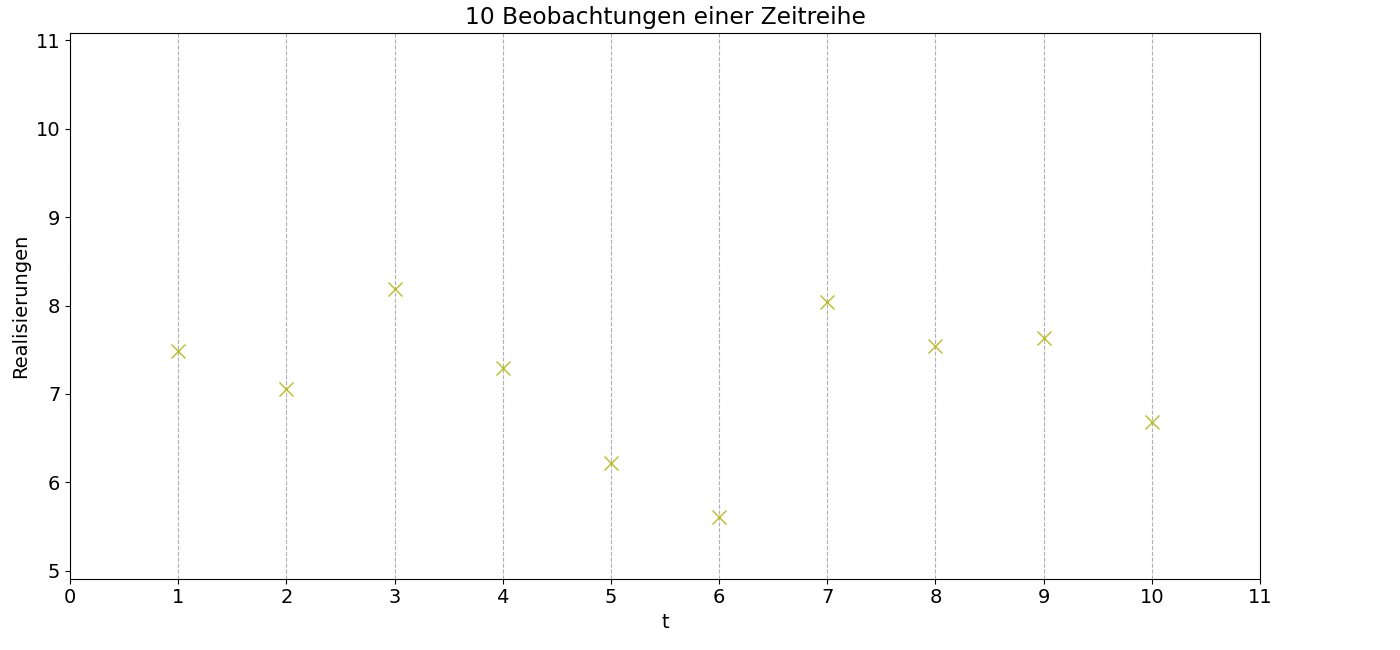

In [3]:
%matplotlib ipympl
from plv.plot import data_vs_process
data_vs_process(figsize=(14, 6.5))

# Stationarität

<br>

- Für die statistische Analyse und Modellierung von Zeitreihen müssen Annahmen getroffen werden, da in der Praxis meist nur eine Realisierung des datengenerierenden Prozesses vorliegt.

<!--
- Neben Ergodizität ist Stationarität eine bedeutende Eigenschaft eines stochastischen Prozesses.
-->
<!-- - Es gibt zwei Definition von Stationarität, die Klasse der stochastischen Prozess einschränken.
-->
- Wir konzentieren uns hier auf die sogenannte **schwache Stationarität**.

<blockquote style="width: auto; background-color: 
                   lightyellow; color: black; 
                   margin: 70px; 
                   padding: 20px; 
                   border: 3px solid #ccc;
                   margin-bottom: 0px;
                   margin-top: 10px
                   ">
Definition: (<strong>Schwache Stationarität</strong>)<br>
Ein stochastischer Prozess $(Y_t)_{t\in \mathbb{Z}}$ ist schwach stationär $:\!\!\iff$
<br><br>
1. $E[Y_t] = \mu \in \mathbb{R}$ <br>
2. $Cov[Y_t, Y_{t-h}] = \gamma(h) \in \mathbb{R}$
<br><br>
für alle $t, h \in \mathbb{Z}$.
</blockquote>

**Der einfachste (schwach) stationäre Prozess**
<br><br>

<blockquote style="width: auto; background-color: 
                   lightyellow; color: black; 
                   margin: 70px; 
                   padding: 20px; 
                   border: 3px solid #ccc
                   ">
Definition: (<strong>Weißes Rauschen</strong>)<br>
$(U_t)_{t\in \mathbb{Z}}$ ist Weißes Rauschen $:\!\!\iff$ Für alle $t, h \in \mathbb{Z}$, mit $t\neq h$ gilt:
<br>

1. $E[U_t] = 0$
2. $Var[U_t] = \sigma^2_U \in \mathbb{R}$
3. $Cov[U_t, U_h] = 0$
</blockquote>

**Die Klasse der (linearen) AR(1) Prozesse**
<blockquote style="width: auto; background-color: 
                   lightyellow; color: black; 
                   margin: 70px; 
                   padding: 20px; 
                   border: 3px solid #ccc;
                   margin-bottom: 0px;
                   margin-top: 50px
                   ">
Definition: (<strong>Autoregressiver Prozess der Ordnung 1</strong>)<br>
$(Y_t)_{t\in \mathbb{Z}}$ ist ein autoregressiver Prozess der Ordnung 1  $:\!\!\iff$<br> Für alle ${t\in \mathbb{Z}}$ gilt

$
\begin{align}
Y_t &= c + aY_{t-1} + U_{t}
\end{align}
$

wobei $(U_t)_{t\in \mathbb{Z}}$ Weißes Rauschen ist.
</blockquote>

- Wir bezeichnen diese Prozesse auch kurz als AR(1) Prozesse.

- Die Zufallsvariable $Y_t$ ist also linear abhängig von der Zufallsvariable $Y_{t-1}$ davor und einem Zufallsfehler $U_t$.
- Frage: Ist $(Y_t)_{t\in \mathbb{Z}}$ (schwach) stationär?

**Simulation von Realisierungen eines AR(1) Prozesses**
- Um diese Frage zu untersuchen, ist es hilfreich Realisierungen des Prozesses zu generieren.

- Wie können wir $T$ Realisierungen eines AR(1) Prozess $Y_t = c + a Y_{t-1} + U_t$ generieren?

```python
import numpy as np

T = 10
(c, a) = (0, 0.5)

u = np.random.normal(size=T)
y = np.zeros(T)
for t in range(1, T):
    y[t] = c + a * y[t-1] + u[t] 
    
print(y)
```

In [5]:
import numpy as np

(c, a) = (0, 0.5)
T = 10
u = np.random.normal(size=T)
y = np.zeros(T)

for t in range(T):
    y[t] = c + a * y[t-1] + u[t]
    
print(y)

[ 0.09500266 -1.63570548 -0.4738066   0.47025473  1.42854195  1.2416595
  1.62753368 -0.91856049 -0.83269241 -0.5588566 ]


Simulation von Realisierungen eines AR(1) Prozesses

<img src="./figures/zeitreihen_2.png" alt="" style="width: 4200px"/>


interactive(children=(FloatSlider(value=0.0, description='a', max=1.1, min=-1.1), IntSlider(value=100, descrip…

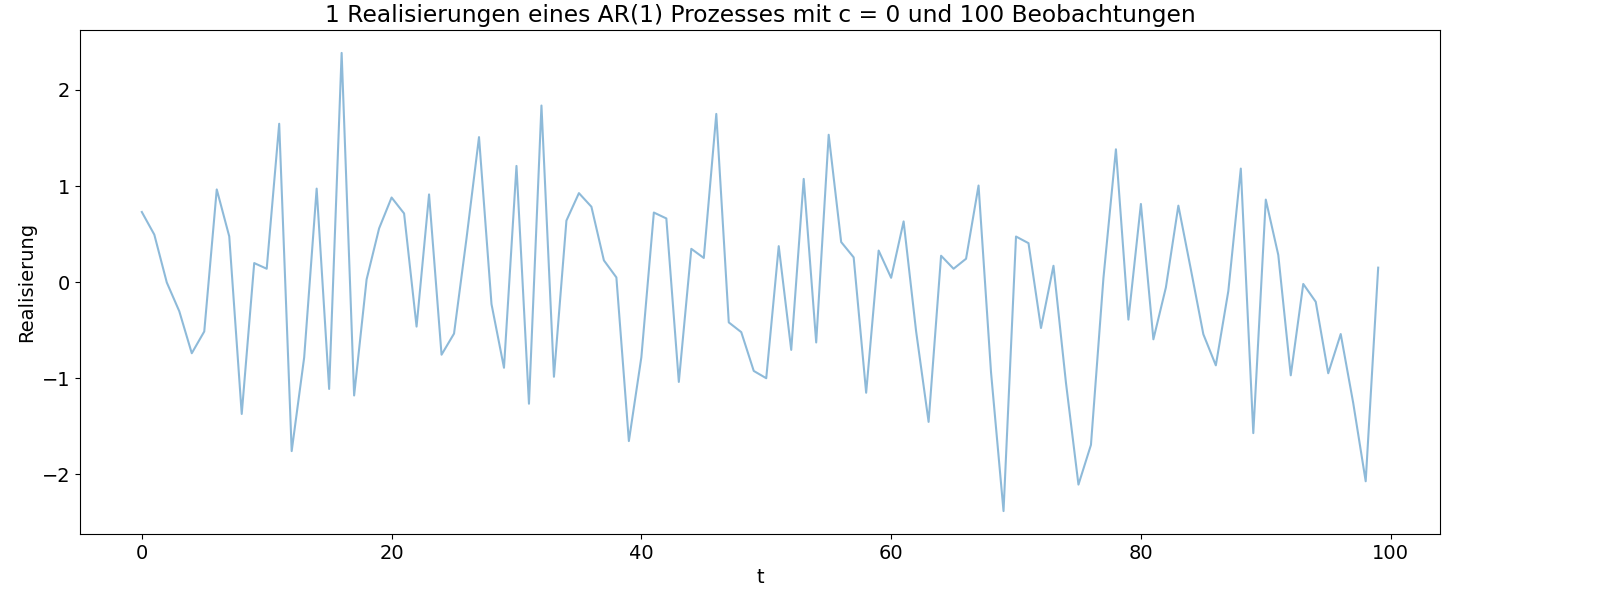

In [4]:
%matplotlib ipympl
from plv.plot import sim_ar
sim_ar(figsize=(16, 6))

Simulation von Realisierungen eines AR(1) Prozesses: Analyse der Stationarität

<img src="./figures/zeitreihen_3.png" alt="" style="width: 4200px"/>

interactive(children=(FloatSlider(value=0.0, description='a', max=1.1, min=-1.1), IntSlider(value=100, descrip…

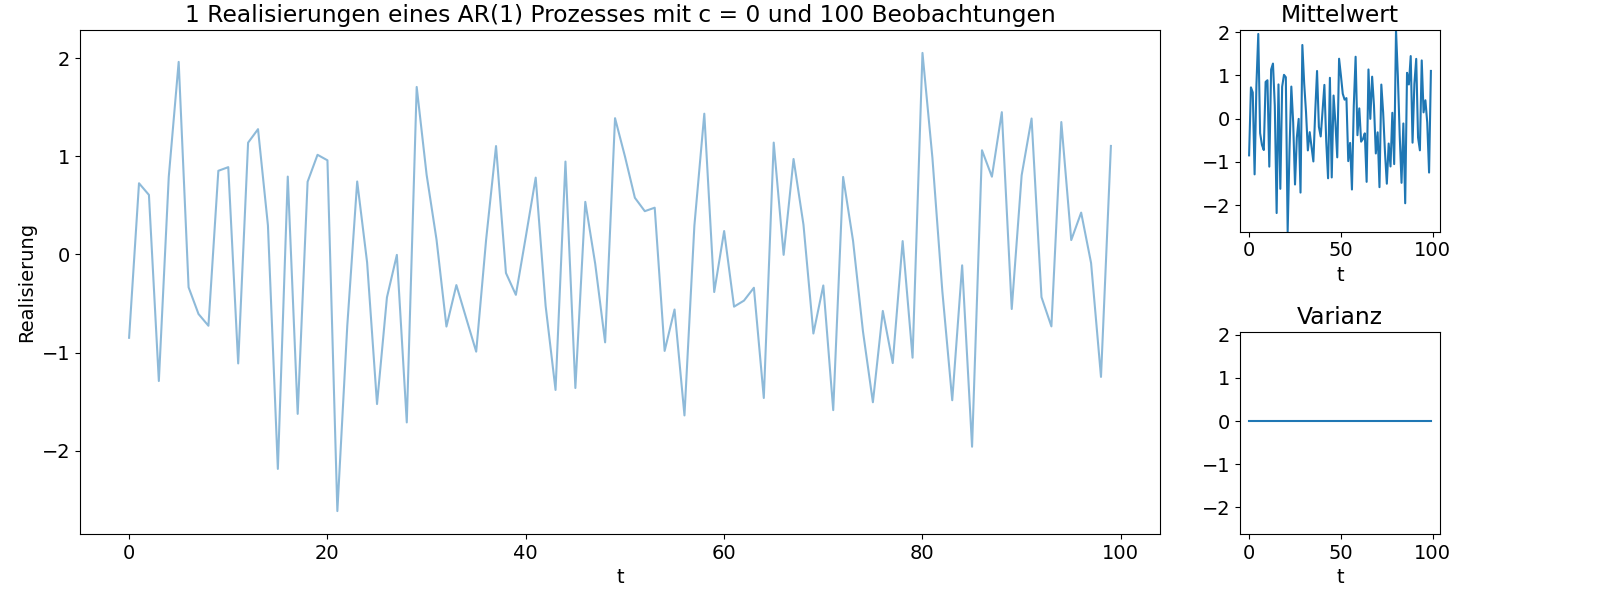

In [5]:
%matplotlib ipympl
sim_ar(figsize=(16, 6), plot_mean_var=True)

**Skizze des Beweis für die schwache Stationarität des AR(1) Prozesses**
<blockquote style="width: auto; background-color: 
                   lightyellow; color: black; 
                   margin: 70px; 
                   padding: 5px; 
                   border: 3px solid #ccc;
                   margin-bottom: -0px;
                   margin-top: 70px
                   ">
Theorem: (<strong>Hinreichende Bedingungen für die Stationarität eines AR(1) Prozesses</strong>)<br>
Sei $Y_t = aY_{t-1} + U_t$, wobei $(U_t)_{t \in \mathbb{Z}}$ Weißes Rauschen ist und $\sup_{t \in \mathbb{Z}} E[Y_t^2] < \infty$. <br><br>
Falls $|a| < 1$,  dann ist $(Y_t)_{t \in \mathbb{Z}}$ schwach stationär.
</blockquote>

- Der Beweis dieses Theorems erfordert Kenntnisse der Maß- und Integrationstheorie.

- Im Folgenden wird der Beweis nur skizziert.

**Beweisidee: Limes Repräsentation von $Y_t$ als eine Funktion von $(U_t)_{t \in \mathbb{Z}}$**

- Rekursive Substituierung führt zu

    $
    \begin{align}
    Y_t & = aY_{t-1} + U_t = a(aY_{t-2} + U_{t-1}) + U_t = \ldots = a^h Y_{t-h} + \sum_{i=0}^{h-1}a^{i}U_{t-i} =: X_h
    \end{align}
    $

- Was passiert mit $X_h$, wenn $h\to\infty$? 
<!-- &#9888;&#65039; $X_h$ ist eine Zufallsvariable. -->

- Man kann zeigen, dass $\exists X \in L^2\colon X_h \stackrel{2}{\to} X$ falls die Annahmen des Theorems erfüllt sind und unter ihrer wiederholte Anwendung folgern, dass 

    $
    \begin{align*}
    E[Y_t] & = 0
    \\
    Cov[Y_t, Y_{t-h}] 
    & = a^h\frac{\sigma_U^2}{1-a^2} \in \mathbb{R}
    \end{align*}
    $

<!--
$
\begin{align*}
E[Y_t] &= 0, \quad
Cov[Y_t, Y_{t-h}] = a^h\frac{\sigma_U^2}{1-a^2} \in \mathbb{R}
\end{align*}
$
-->

<!--
$
\begin{align*}
E[Y_t] & = 0
\\
Cov[Y_t, Y_{t-h}] 
& = a^h\frac{\sigma_U^2}{1-a^2}
\end{align*}
$
Somit ist $E[Y_t]=0$ und $\gamma(t, h) \in \mathbb{R}$ hängt nicht von $t$ ab. Folglich ist $(Y_t)_{t \in \mathbb{Z}}$ stationär. &#11035;
-->

# Praktische Anwendung: Modellierung und Prognose der Inflationsrate

<br>

- Im Folgenden schätzen wir AR(1) Prozesse mittels des Kleinsten Quadrate Schätzers für mehrere "in-sample" Zeiträume.

- Ein "in-sample" Zeitraum der Länge $T$ beinhaltet die Daten, die für die Schätzung benutzt werden,
    und geht von Stichprobenanfang bis zu einem gewissen Monat. 
- Die "out-of-sample" Daten sind dann die Daten nach diesem Monat.
- Für diese "out-of-sample" Daten machen wir ab dem Zeitpunkt $T$ eine **Mehrschrittprognose** $\text{Pred}_T[Y_{T+h}], h\geq 1$, die rekursiv gegeben ist durch

$$\text{Pred}_T[Y_{T+h}] = a\text{Pred}_T[Y_{T+h-1}]$$

**Modellierung der Inflationsrate mit einem AR(1) Prozess**

<img src="./figures/zeitreihen_4.png" alt="" style="width: 4200px"/>

interactive(children=(IntSlider(value=2008, description='Jahr', max=2024, min=2008), IntSlider(value=1, descri…

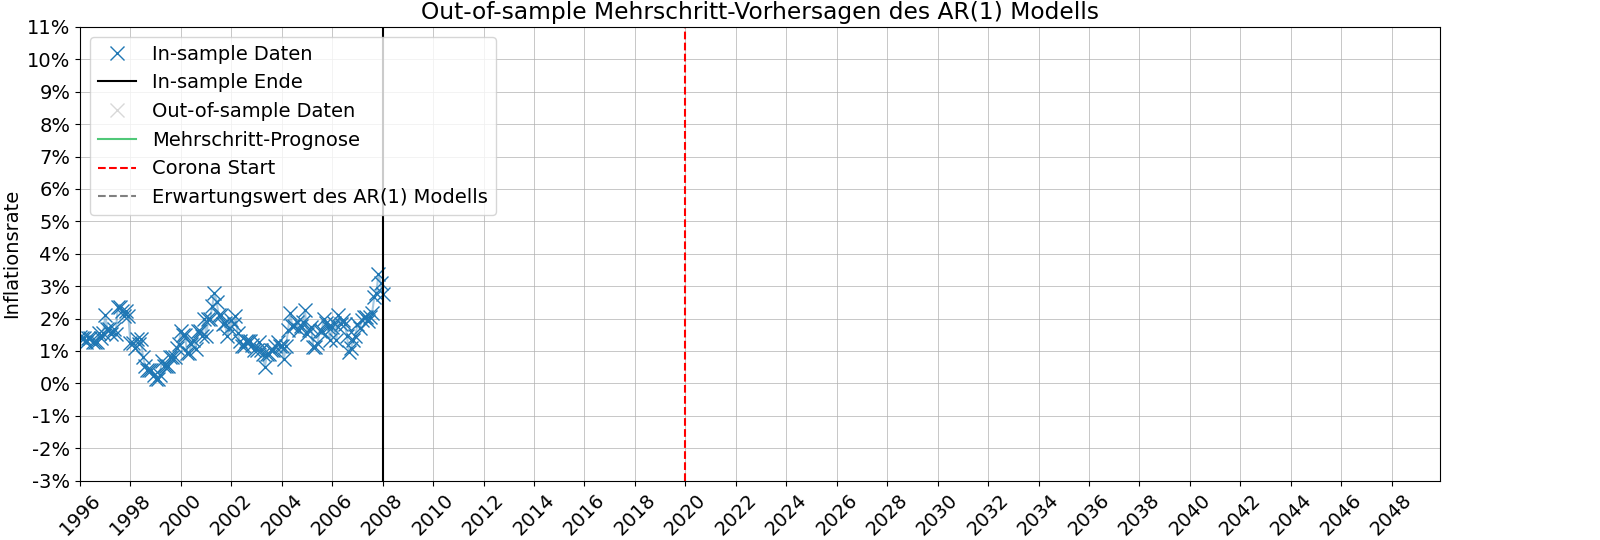

In [6]:
%matplotlib ipympl
from plv.plot import forecast_inflation
forecast_inflation(figsize=(16, 5.4))

**Beobachtungen:**
- Die Annahme der schwachen Stationarität ist ab der Corona Krise fraglich.
- Auch wenn der geschätzte autoregressive Parameter $a$ des AR(1) Prozesses kleiner als 1 ist, wenn man bis zum aktuellsten Monat schätzt, so ist die langfristige Prognose eventuell zu hoch.

**Frage:**

Wie können wir unsere Modellierung verändern, falls die Ereignisse im Zeitraum Krise = [Januar 2020, Februar 2023] eine Ausnahme darstellen und diese die langfristige Prognose der Inflation nicht beeinflussen sollten?

**Idee:**

Definiere die Krisen Dummy $D_t$, so dass $D_t = 1$ wenn $t \in \text{Krise}$ und 0 sonst, und schätze
$\begin{align}Y_t = c + aY_{t-1} + \delta D_t + U_t\end{align}$.

**Modellierung der Inflationsrate mit einem AR(1) Prozess mit Dummy**

<img src="./figures/zeitreihen_5.png" alt="" style="width: 4200px"/>

interactive(children=(IntSlider(value=2019, description='Jahr', max=2024, min=2008), IntSlider(value=12, descr…

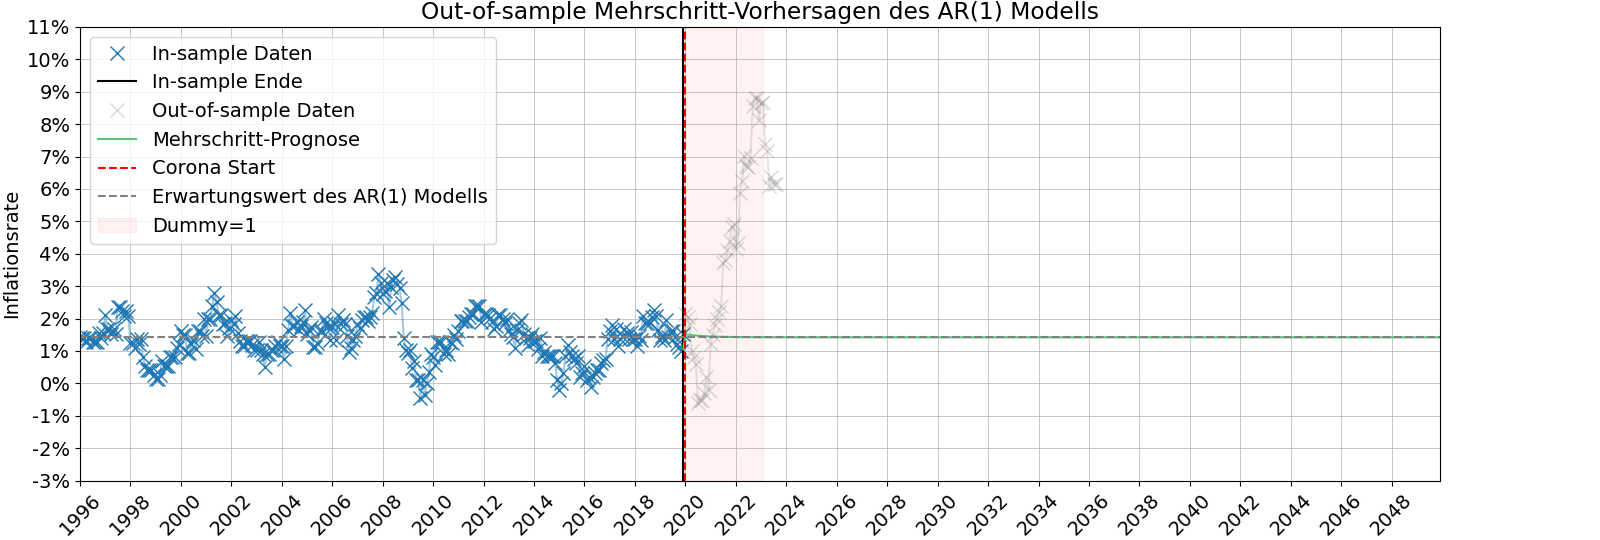

In [7]:
%matplotlib ipympl
forecast_inflation(dummy=True, figsize=(16, 5.4))

# Zusammenfassung
<br>

- Wir haben den Zusammenhang zwischen einem Zeitreihenprozess und -daten illustriert.

- Wir haben die Definition der (schwache) Stationarität kennen gelernt.
- Wir haben den (linearen) AR(1) Prozess kennengelernt und untersucht wann er stationär ist.
- Durch eine praktische Anwendung des AR(1) Prozess anhand der Modellierung der Inflationsrate haben wir das Konzept der Stationarität weiter vertieft und kritisch hinterfragt.


# Literatur

Hamilton, James D. Time Series Analysis. Princeton University Press, 1994. https://doi.org/10.2307/j.ctv14jx6sm.

Lütkepohl, Helmut. New Introduction to Multiple Time Series Analysis. Springer, 2005. https://doi.org/10.1007/978-3-540-27752-1